## Observations and Insights

1) The Capomulin and Ramicane drug regimens showed the most promising final tumor volume as seen in the box and whisker plot with their mean values being well below Ceftamin and Infubinol.

2) Mouse weight and average tumor volume has a strong correlation for the drug Capomulin (correlation coefficient @ 0.95).

3) Capomulin and Ramicane had more datapoints per treatment as compared to the rest of the regimens. This could potentially affect the final tumor volumes for the other drugs if Capomulin and Ramicane measured more effectively and for a longer period of time. Looking at final tumor volumes, some Mouse IDs final measurement was at timepoint zero indicating a lack of data points and accuracy for some regimens.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [2]:
# See mouse_metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# See study_results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Data types look good for meta_data
mouse_metadata.dtypes

Mouse ID        object
Drug Regimen    object
Sex             object
Age_months       int64
Weight (g)       int64
dtype: object

In [5]:
# Data types look good for study_results
study_results.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [6]:
# Combine the data into a single dataset - by mouse ID (shared column), using outer join to preserve all data
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics
Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [7]:
# Groupby regimen to see data by regimen
grouped_regimen_df = combined_data.groupby(['Drug Regimen'])

In [8]:
# Calculations for statistics
tumor_mean = grouped_regimen_df['Tumor Volume (mm3)'].mean()
tumor_median = grouped_regimen_df['Tumor Volume (mm3)'].median()
tumor_variance = grouped_regimen_df['Tumor Volume (mm3)'].var()
tumor_std = grouped_regimen_df['Tumor Volume (mm3)'].std()
tumor_sem = grouped_regimen_df['Tumor Volume (mm3)'].sem()

In [9]:
# Summary statistics table
summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume (mm3)":tumor_mean,
    "Median Tumor Volume (mm3)":tumor_median,
    "Var Tumor Volume (mm3)":tumor_variance,
    "STD Tumor Volume (mm3)":tumor_std,
    "SEM Tumor Volume (mm3)":tumor_sem})

summary_stats_df.sort_values(by = ['Mean Tumor Volume (mm3)'])

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Var Tumor Volume (mm3),STD Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots


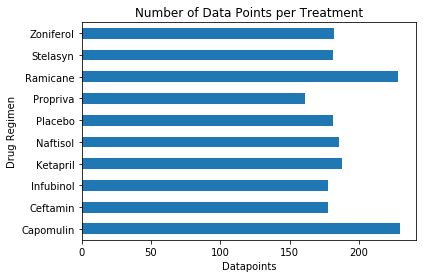

In [10]:
# Count of data points per treatment
# note, another way - combined_data['Drug Regimen'].value_counts()
datapts_count = grouped_regimen_df['Timepoint'].count()

# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapts_count.plot(kind ="barh", title = "Number of Data Points per Treatment")

# Label x-axis
plt.xlabel("Datapoints")

# Show pandas bar plot
plt.show()

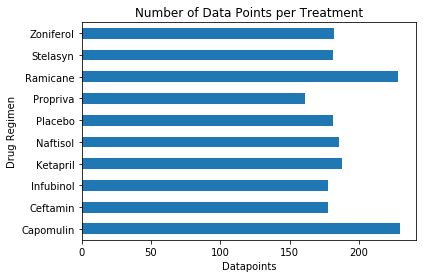

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
fig, ax = plt.subplots()
datapts_count.plot(kind = "barh", ax = ax)
ax.set(title = "Number of Data Points per Treatment", xlabel = "Datapoints", ylabel = "Drug Regimen")

# Show pyplot bar plot
plt.show()

## Pie plots

In [12]:
# Get female versus male distributin
gender_df = combined_data.groupby(['Sex'])
gender_count = gender_df['Sex'].count()

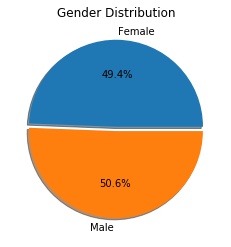

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (0.05,0)
gender_count.plot(kind ="pie", title = "Gender Distribution", autopct = "%1.1f%%", explode = explode, shadow = True)
plt.ylabel("")

# Show pandas pie plot
plt.show()

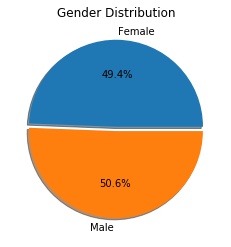

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots()
gender_count.plot(kind = "pie", autopct = "%1.1f%%", explode = explode,shadow = True, ax = ax)
ax.set(title = "Gender Distribution")
ax.set_ylabel("")

# Show pyplot bar plot
plt.show()

## Quartiles, outliers and boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 

# Isolate the four regimens using loc
four_regimens = combined_data.loc[(combined_data['Drug Regimen'] == "Capomulin") | 
                                    (combined_data['Drug Regimen'] == "Ramicane") |
                                    (combined_data['Drug Regimen'] == "Infubinol") |
                                    (combined_data['Drug Regimen'] == "Ceftamin"), : ]

# Sort Timepoints by descending values
four_regimens = four_regimens.sort_values("Timepoint", ascending = False)

# Drop duplicates by mouse ID and keep first value
dedupe_four_regimens = four_regimens.drop_duplicates(subset="Mouse ID", keep='first')

# See final tumor volume by mouse ID
dedupe_four_regimens.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
1205,m756,Infubinol,Male,19,30,5,47.010364,1
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0


In [16]:
# Calculate the IQR
quartiles = dedupe_four_regimens["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The interquartile range of final tumor volumes is: {iqr}")

The interquartile range of final tumor volumes is: 22.74251795250001


In [17]:
# Quantitatively determine if there are any potential outliers.
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print outlier bounds
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [18]:
# Find outliers using iloc
outliers = dedupe_four_regimens.loc[(dedupe_four_regimens["Tumor Volume (mm3)"] < 3.0739668737499812) | 
                                    (dedupe_four_regimens["Tumor Volume (mm3)"] > 94.04403868375002), : ]

# Show outliers --> resulted in no outliers for all 4 regimens
outliers["Tumor Volume (mm3)"].count()

0

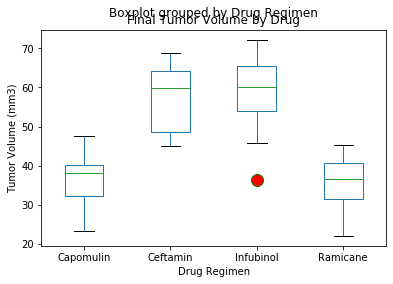

In [19]:
# Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens.
# Highlight any potential outliers in the plot by changing their color and style

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')

fig, ax = plt.subplots()
dedupe_four_regimens.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = False, ax = ax, flierprops=flierprops)
ax.set(title = "Final Tumor Volume by Drug", xlabel = "Drug Regimen", ylabel = "Tumor Volume (mm3)")
plt.show()

## Line and scatter plots

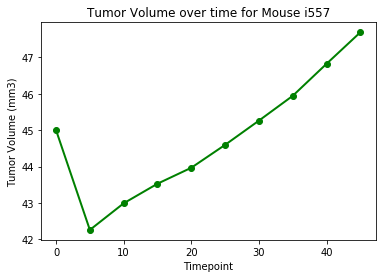

In [20]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin

# Isolate the data needed for i557 treated with Caplomulin
capomulin_df = four_regimens.loc[(four_regimens['Drug Regimen'] == "Capomulin"), :]
i557 = capomulin_df.loc[(capomulin_df["Mouse ID"] == "i557"), :]

# Plot the data in a line plot
plt.plot(i557["Timepoint"], i557["Tumor Volume (mm3)"], color='green', marker='o',linewidth=2, markersize=6)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume over time for Mouse i557')
plt.show()

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight_df = capomulin_df.groupby(['Weight (g)'])

mouse_weight = mouse_weight_df['Weight (g)'].unique()
avg_volume = mouse_weight_df['Tumor Volume (mm3)'].mean()

mouse_tumor_df = pd.DataFrame({
    "Mouse Weight": mouse_weight,
    "Averge Tumor Volume":avg_volume
    })

mouse_tumor_df

,Mouse Weight,Averge Tumor Volume
Weight (g),,
15,[15],36.182040
17,[17],37.214133
19,[19],41.182391
20,[20],39.141053
21,[21],42.088700
22,[22],43.288490
23,[23],43.341051
24,[24],44.805810
25,[25],44.062109


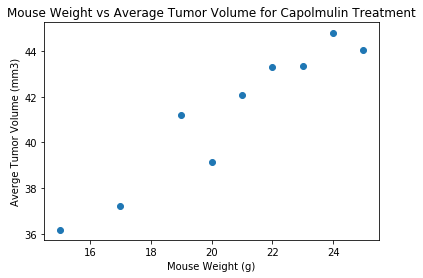

In [22]:
# Scatter plot for mouse weight versus tumor volume for the Capomulin regimen
plt.scatter(mouse_tumor_df['Mouse Weight'], mouse_tumor_df['Averge Tumor Volume'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Averge Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capolmulin Treatment')
plt.show()

In [23]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
weight = mouse_tumor_df.iloc[:,0].astype('float64')
volume = mouse_tumor_df.iloc[:,1]

correlation = st.pearsonr(weight,volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.95


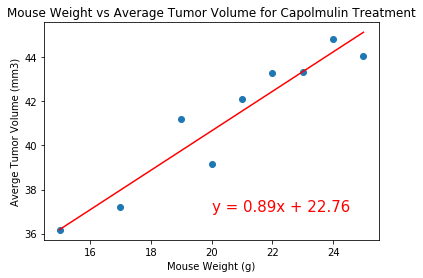

In [24]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_tumor_df.iloc[:,0].astype('float64')
y_values = mouse_tumor_df.iloc[:,1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Averge Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capolmulin Treatment')
plt.show()